In [1]:
import os
os.environ['KERAS_BACKEND']='tensorflow'
import datetime
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.optimizers

import numpy as np

import lib.data_loader as dl


Using TensorFlow backend.


# Multilayer Perceptron Exercise

The goal of this exercise is to build and train a Multilayer perceptron NN to recognize hand-written digits, i.e. from 0 to 9.

In [2]:
num_classes=10

## The dataset

The dataset we will be using for this session is called MNIST (http://yann.lecun.com/exdb/mnist/). This is a well known example:

>The MNIST database was constructed from NIST's Special Database 3 and Special Database 1 which contain binary images of handwritten digits. NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers.
It is important noting that the digits have been size-normalized and centered in a fixed-size image.

Let's read our dataset and draw a sample from it.

In [3]:
(x_train, y_train), (x_test, y_test) = dl.load_mnist_data_for_mlp() # load the dataset
print("The shape of the X training set: {}".format(x_train.shape))
print("The shape of the Y training set: {}".format(y_train.shape))
print("The shape of the X test set: {}".format(x_test.shape))
print("The shape of the Y test set: {}".format(y_test.shape))

The shape of the X training set: (60000, 784)
The shape of the Y training set: (60000, 10)
The shape of the X test set: (10000, 784)
The shape of the Y test set: (10000, 10)


We will use an auxiliary function to plot it.

In [4]:
random_indexes = np.random.randint(len(x_train), size=5)
print("The selected random indexes: {}".format(random_indexes))

The selected random indexes: [10978 27499 26048 27870 58611]


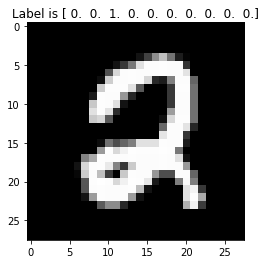

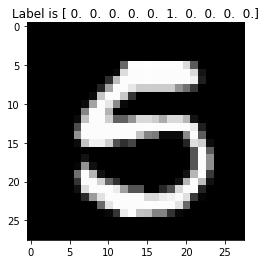

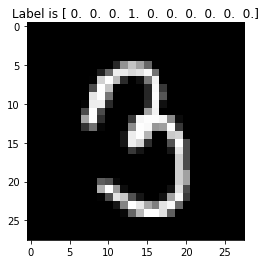

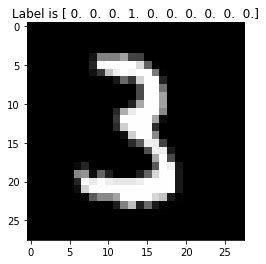

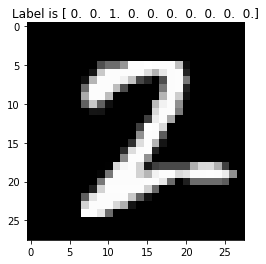

In [5]:
for index in random_indexes:
    label = y_train[index]
    digit = x_train[index]
    dl.plot_digit(digit, label)

In [6]:
x_train = x_train/255
x_test = x_test/255

## Specifying the NN

We will start with a very simple NN with a single fullly connected hidden layer. Our model is sequential, as we don't have feedback in it. First we instatiate the model:

In [30]:
model = Sequential()

Then we add the layers to it. For the first layer we specify that it is a fully connected layer by instantiating a `Dense` object, then  need to specify the `input_shape` parameter, that we get from our dataset. After that, we specify a Rectified Linear Unit as its activation function. 

In [31]:
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', input_shape=(784,)))

We then specify an output layer with a `softmax` activation function. This function maps an array into a probability distribution with 1 as the sum.

In [32]:
model.add(Dense(10, activation='softmax'))

We can check our model using the `summary()` method.

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


After dat we need to compile our model, by setting which optimizer it will use and what are the metrics that we will use for fitting the model.  
A list of optimizers can be found <a href="https://keras.io/optimizers/">here</a>.  
A list of loss functions can be found <a href="https://keras.io/losses/">here</a>.  
A list of metrics can be found <a href="https://keras.io/metrics/">here</a>.  

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

Now we can train our model. We have to specify a few parameters first.  
We have to specify the number of `epochs`, i.e., the number of forward/backpropagation cycles; the `batch_size`, i.e., the number of samples used to train at a time - this parameter optimizes the memory/cache usage. We can also specify a `verbose` parameter to have some feedback while we are training our neural network.

In [49]:
batch_size = 128
epochs = 20

Now it is training time:

In [50]:
t = datetime.datetime.now()
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
print('Training time: %s' % (datetime.datetime.now() - t))

Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.1870 - acc: 0.9434     
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.1342 - acc: 0.9594     
Epoch 3/20
60000/60000 [==============================] - ETA: 0s - loss: 0.1116 - acc: 0.966 - 3s - loss: 0.1115 - acc: 0.9662     
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0963 - acc: 0.9706     
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0877 - acc: 0.9741     
Epoch 6/20
60000/60000 [==============================] - 2s - loss: 0.0759 - acc: 0.9766     
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0738 - acc: 0.9770     
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.0686 - acc: 0.9789     
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.0617 - acc: 0.9807     
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.0593 - acc: 0.9817     
Epoch 11/20

Now we can evaluate our model.

In [51]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Available metrics are: \n{}".format(model.metrics_names))
print(score)

Available metrics are: 
['loss', 'acc']
[0.083359940548170655, 0.97889999999999999]


Let's again draw a random sample from our test dataset and see how good our predictor is:

In [52]:
random_draw = np.random.randint(len(x_test), size=5)
print("Randomly selected test observations index: {}".format(random_draw))

Randomly selected test observations index: [   8 7649 8336 1341 6413]


Value Predicted: [5]
Plot: 


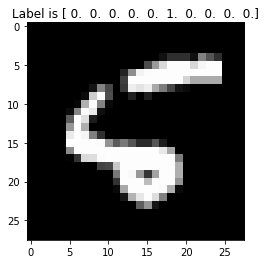

Value Predicted: [5]
Plot: 


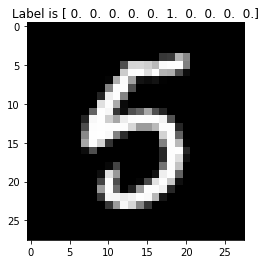

Value Predicted: [6]
Plot: 


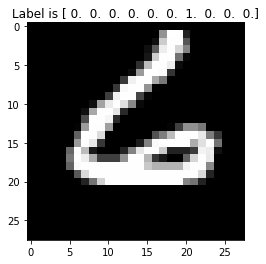

Value Predicted: [2]
Plot: 


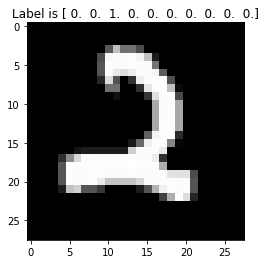

Value Predicted: [3]
Plot: 


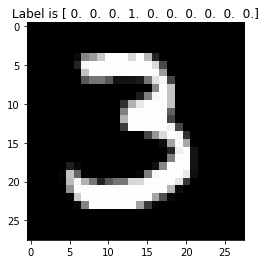

In [53]:
for i in random_draw:
    predicted_value = model.predict_classes(x=x_test[[i]].reshape(1,784), verbose=False)
    print("Value Predicted: {}".format(predicted_value))
    print("Plot: ")
    dl.plot_digit(x_test[i], y_test[i])

# The tasks

Now it is time to get our hands dirty.

## 1. Build a dummy classifier.

The accuracy we are getting so far is really bad. How about building one of the dummest classifiers there is: throwing a 10 face die? 

## 2. Improving the dataset.

Neural Networks are known to behave better on normalized datasets. By knowing that there only 256 (from 0 to 255) possible values for the gray scale. How about normalize the dataset?

## 3. Changing the NN topology

Try tweaking the NN topology a bit. Make some small changes in the model:
1. Increase the number of neurons at the hidden layer to `128`.
1. Add a new 128-neuron `Dense` layer.
1. Increase the number of epochs to 10, then 20.
1. Add new `Dropout` layers in between the hidden layers (20% is a good start for a dropout).
1. Try to use the `categorical_crossentropy` loss function.
1. Try to use the `RMSProp` optimizer.